<a href="https://colab.research.google.com/github/Anshu666h/Asstudio/blob/master/Pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 QUES 1. Implement a basic pattern recognition system to classify handwritten digits using Bayesian decision theory and compare it with other classifiers.

Accuracy (Bayesian Classifier): 0.77
Accuracy (k-NN): 0.97
Accuracy (SVM): 0.97


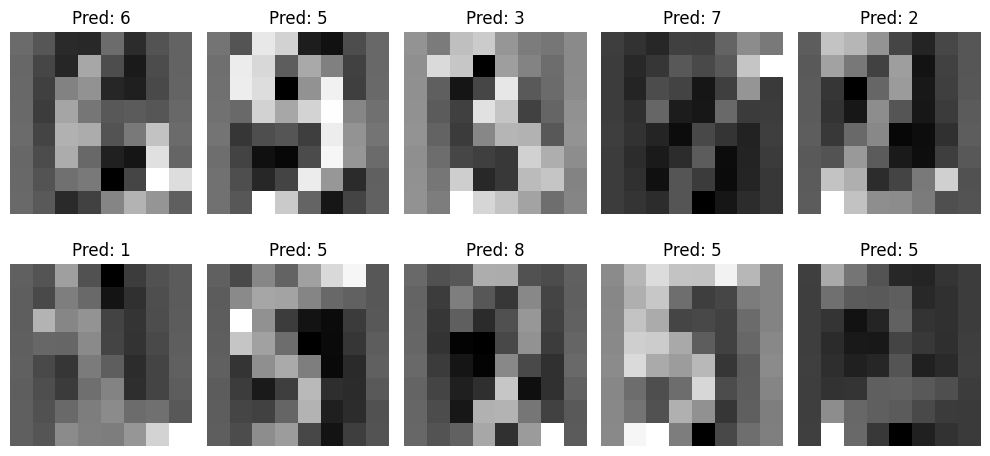

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the handwritten digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target  # Flattened 8x8 images (64 features)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Bayesian Decision Theory using Naïve Bayes
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
y_pred_bayes = bayes_model.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print(f'Accuracy (Bayesian Classifier): {accuracy_bayes:.2f}')

# Compare with k-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (k-NN): {accuracy_knn:.2f}')

# Compare with SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.2f}')

# Visualizing sample test images with predicted labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f'Pred: {y_pred_bayes[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

 QUES 2. Develop a program to compute eigenvalues and eigenvectors of a matrix and use Singular Value Decomposition (SVD) to reduce dimensionality in a dataset.

In [ ]:
import numpy as np
from scipy.linalg import svd

# Function to compute eigenvalues and eigenvectors
def compute_eigen(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

# Function to perform SVD and reduce dimensionality
def reduce_dimensionality(data, num_components):
    U, S, Vt = svd(data, full_matrices=False)
    reduced_data = np.dot(U[:, :num_components], np.diag(S[:num_components]))
    return reduced_data

# Example usage
if __name__ == "__main__":
    # Example matrix for eigenvalue and eigenvector computation
    matrix = np.array([[4, -2],
                       [1,  1]])

    eigenvalues, eigenvectors = compute_eigen(matrix)
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)

    # Example dataset for SVD
    data = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

    num_components = 2
    reduced_data = reduce_dimensionality(data, num_components)
    print("Reduced Data:\n", reduced_data)


Eigenvalues: [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
Reduced Data:
 [[ -3.6196       0.94789022]
 [ -8.77091014   0.26671199]
 [-13.92222029  -0.41446624]]


 QUES 3. Apply Fisher discriminant analysis to a dataset and visualize the discriminant functions and decision surfaces for classification tasks.

Classification Accuracy using LDA: 0.90


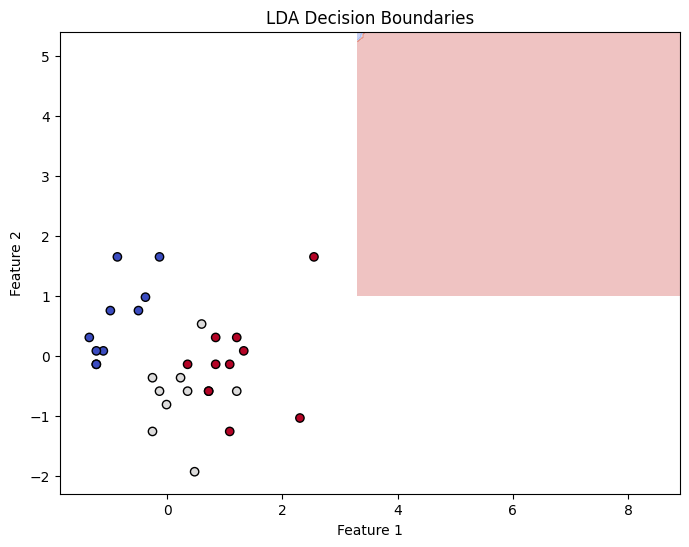

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset)
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Using first two features for easy visualization

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Linear Discriminant Analysis (LDA)
lda = LDA()
lda.fit(X_train, y_train)

# Predict class labels
y_pred = lda.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy using LDA: {accuracy:.2f}')

# Visualization of Decision Boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = lda.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Decision Boundaries')
plt.show()

 QUES 4. Perform Principal Component Analysis (PCA) on a dataset and visualize the principal components and explained variance.

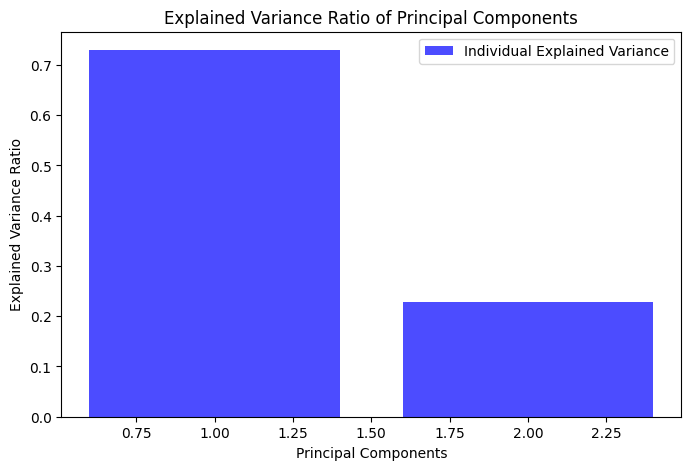

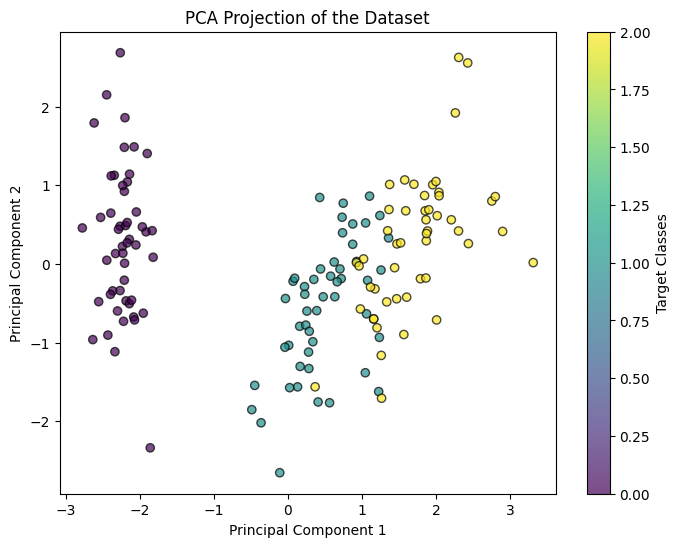

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance, alpha=0.7, color='b', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio of Principal Components')
plt.legend()
plt.show()

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of the Dataset')
plt.colorbar(label='Target Classes')
plt.show()

 QUES 5. Use non-parametric techniques for density estimation to classify data points and evaluate the performance of the method.

Classification Accuracy using k-NN: 0.80


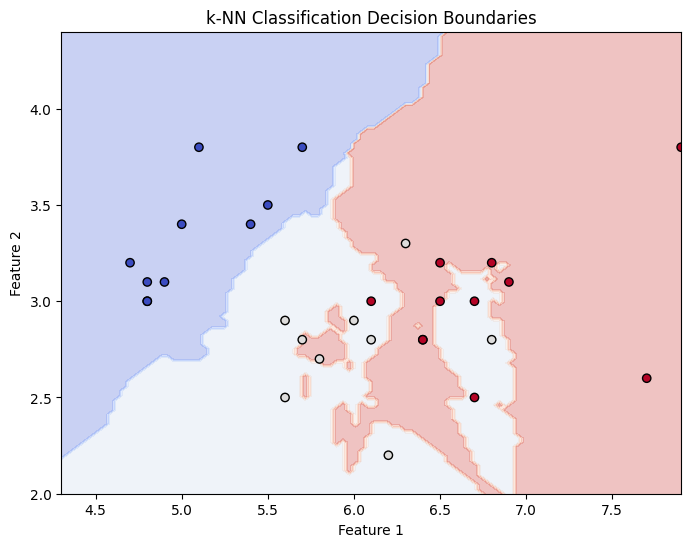

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset)
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Using first two features for simplicity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use k-NN for classification (Non-Parametric)
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy using k-NN: {accuracy:.2f}')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = knn.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN Classification Decision Boundaries')
plt.show()